In [1]:
import warnings
warnings.filterwarnings('ignore') # Filter out warnings
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from scipy import stats
import math
from math import isnan

In [26]:
df.head(5)

,Time_stamp,Type,OrderID,V,P,Dir,Time,P_ask_1,V_ask_1,P_bid_1,...,V_bid_3,P_ask_4,V_ask_4,P_bid_4,V_bid_4,P_ask_5,V_ask_5,P_bid_5,V_bid_5,Class
0,34200.017460,5,0,1,2238200,-1,2012-06-21 09:30:00.017460,2239500,100,2231800,...,100,2242500,100,2230000,10,2244000,547,2226200,100,la
1,34200.189608,1,11885113,21,2238100,1,2012-06-21 09:30:00.189608,2239500,100,2238100,...,200,2242500,100,2230400,100,2244000,547,2230000,10,lb
2,34200.189608,1,3911376,20,2239600,-1,2012-06-21 09:30:00.189608,2239500,100,2238100,...,200,2240000,220,2230400,100,2242500,100,2230000,10,la
3,34200.189608,1,11534792,100,2237500,1,2012-06-21 09:30:00.189608,2239500,100,2238100,...,100,2240000,220,2230700,200,2242500,100,2230400,100,lb
4,34200.189608,1,1365373,13,2240000,-1,2012-06-21 09:30:00.189608,2239500,100,2238100,...,100,2240000,233,2230700,200,2242500,100,2230400,100,la


In [29]:
# Create a Combined Dataframe from message csv and orderbook csv
def Merge_MsgAndOrdb(msg_path,ordb_path):
    # get the level of the LOBSTER dataset
    level = int(msg_path.split(".")[0][-1])
    # get the date 
    date = msg_path.split(".")[0].split("_")[1]
    
    # add header row for message csv
    msg_names = ["Time_stamp", "Type", "OrderID", "V","P","Dir"] # V: size; P: price; Dir: direction
    df_msg = pd.read_csv(msg_path,names=msg_names)
    # add header row for orderbook csv
    default_ordb_names = ['P_ask','V_ask','P_bid','V_bid']
    ordb_names = []
    for i in range(level):
        for item in default_ordb_names:
            ordb_names.append(str(item)+str("_")+str(i+1))
    df_ordb = pd.read_csv(ordb_path,names=ordb_names)
    
    # adding a meaningful time column
    df_msg['Time'] = pd.to_datetime(df_msg['Time_stamp'],unit="s",origin=pd.Timestamp(date))
    
    # combine two dataframes and return it
    df = pd.concat([df_msg,df_ordb],axis=1)
    return df


In [30]:
df = Merge_MsgAndOrdb(msg_path='AMZN_2012-06-21_34200000_57600000_message_5.csv',
                     ordb_path='AMZN_2012-06-21_34200000_57600000_orderbook_5.csv')
df.head(5)

,Time_stamp,Type,OrderID,V,P,Dir,Time,P_ask_1,V_ask_1,P_bid_1,...,P_bid_3,V_bid_3,P_ask_4,V_ask_4,P_bid_4,V_bid_4,P_ask_5,V_ask_5,P_bid_5,V_bid_5
0,34200.017460,5,0,1,2238200,-1,2012-06-21 09:30:00.017460,2239500,100,2231800,...,2230400,100,2242500,100,2230000,10,2244000,547,2226200,100
1,34200.189608,1,11885113,21,2238100,1,2012-06-21 09:30:00.189608,2239500,100,2238100,...,2230700,200,2242500,100,2230400,100,2244000,547,2230000,10
2,34200.189608,1,3911376,20,2239600,-1,2012-06-21 09:30:00.189608,2239500,100,2238100,...,2230700,200,2240000,220,2230400,100,2242500,100,2230000,10
3,34200.189608,1,11534792,100,2237500,1,2012-06-21 09:30:00.189608,2239500,100,2238100,...,2231800,100,2240000,220,2230700,200,2242500,100,2230400,100
4,34200.189608,1,1365373,13,2240000,-1,2012-06-21 09:30:00.189608,2239500,100,2238100,...,2231800,100,2240000,233,2230700,200,2242500,100,2230400,100


In [41]:
#print(df.iloc[2])
#print(df.iloc[3])5
#df.head(8).to_csv("example_dfOriginal.csv")
row = df.iloc[2]

def lob(axis, row):
    bid_levels = [int(row["P_bid_{}".format(i)])/1e5 for i in range(1,6)]
    ask_levels = [int(row["P_ask_{}".format(i)])/1e5 for i in range(1,6)]
    bid_volume = [int(row["V_bid_{}".format(i)]) for i in range(1,6)]
    ask_volume = [int(row["V_ask_{}".format(i)]) for i in range(1,6)]

    #print(row["P"]/1e5)
    #print(bid_levels)
    #print(ask_levels)
    mid = max(bid_levels) + (min(ask_levels) - max(bid_levels))/2
    #print(mid)

    #plt.bar(range(len(bid_volume)), bid_volume, align="center")
    #plt.bar(range(5,len(ask_volume)+5), ask_volume, align="center")
    axis.bar(bid_levels, bid_volume, align="center", width=0.01, alpha=0.5, edgecolor="k")
    axis.bar(ask_levels, ask_volume, align="center", width=0.01, alpha=0.5, edgecolor="k")
    if (row["Dir"] == -1):
        axis.axvline(int(row["P"])/1e5, color="red")
    else:
        axis.axvline(int(row["P"])/1e5, color="blue")
    axis.axvline(mid, ls="--", color="k")

In [9]:
indicies = []
classes = []
for index, row in df.iterrows():
    mid_price = row["P_bid_1"] + (row["P_ask_1"] - row["P_bid_1"])/2
    #print(row["P"], row["Dir"], row["P_bid_1"], row["P_ask_1"], mid_price)
    if (row["P"] > mid_price):
        if (row["Dir"] == -1):
            classes.append("la")
        else:
            classes.append("ma")
            indicies.append(index)
    elif (row["P"] < mid_price):
        if (row["Dir"] == -1):
            classes.append("mb")
            indicies.append(index)
        else:
            classes.append("lb")
    else:
        print("Warning: row[P] == mid_price")
        classes.append("0")
    if (index%1000 == 0):
        print("{:0.1f}%".format(100*index/len(df.index)), end=" ")
        
df["Class"] = classes
#     print(row["Class"], row["P"])
#     if (row["Dir"] == -1):
#         lob(row)
#     else:
#         lob(row, color="blue")

2018-03-05 13:27:33.765483
0 155935
100 155935
200 155935
300 155935
400 155935
500 155935
600 155935
700 155935
800 155935
900 155935
1000 155935
1100 155935
1200 155935
1300 155935
1400 155935
1500 155935
1600 155935
1700 155935
1800 155935
1900 155935
2000 155935
2100 155935
2200 155935
2300 155935
2400 155935
2500 155935
2600 155935
2700 155935
2800 155935
2900 155935
3000 155935
3100 155935
3200 155935
3300 155935
3400 155935
3500 155935
3600 155935
3700 155935
3800 155935
3900 155935
4000 155935
4100 155935
4200 155935
4300 155935
4400 155935
4500 155935
4600 155935
4700 155935
4800 155935
4900 155935
5000 155935
5100 155935
5200 155935
5300 155935
5400 155935
5500 155935
5600 155935
5700 155935
5800 155935
5900 155935
6000 155935
6100 155935
6200 155935
6300 155935
6400 155935
6500 155935
6600 155935
6700 155935
6800 155935
6900 155935
7000 155935
7100 155935
7200 155935
7300 155935
7400 155935
7500 155935
7600 155935
7700 155935
7800 155935
7900 155935
8000 155935
8100 155935
8

59400 155935
59500 155935
59600 155935
59700 155935
59800 155935
59900 155935
60000 155935
60100 155935
60200 155935
60300 155935
60400 155935
60500 155935
60600 155935
60700 155935
60800 155935
60900 155935
61000 155935
61100 155935
61200 155935
61300 155935
61400 155935
61500 155935
61600 155935
61700 155935
61800 155935
61900 155935
62000 155935
62100 155935
62200 155935
62300 155935
62400 155935
62500 155935
62600 155935
62700 155935
62800 155935
62900 155935
63000 155935
63100 155935
63200 155935
63300 155935
63400 155935
63500 155935
63600 155935
63700 155935
63800 155935
63900 155935
64000 155935
64100 155935
64200 155935
64300 155935
64400 155935
64500 155935
64600 155935
64700 155935
64800 155935
64900 155935
65000 155935
65100 155935
65200 155935
65300 155935
65400 155935
65500 155935
65600 155935
65700 155935
65800 155935
65900 155935
66000 155935
66100 155935
66200 155935
66300 155935
66400 155935
66500 155935
66600 155935
66700 155935
66800 155935
66900 155935
67000 155935

115600 155935
115700 155935
115800 155935
115900 155935
116000 155935
116100 155935
116200 155935
116300 155935
116400 155935
116500 155935
116600 155935
116700 155935
116800 155935
116900 155935
117000 155935
117100 155935
117200 155935
117300 155935
117400 155935
117500 155935
117600 155935
117700 155935
117800 155935
117900 155935
118000 155935
118100 155935
118200 155935
118300 155935
118400 155935
118500 155935
118600 155935
118700 155935
118800 155935
118900 155935
119000 155935
119100 155935
119200 155935
119300 155935
119400 155935
119500 155935
119600 155935
119700 155935
119800 155935
119900 155935
120000 155935
120100 155935
120200 155935
120300 155935
120400 155935
120500 155935
120600 155935
120700 155935
120800 155935
120900 155935
121000 155935
121100 155935
121200 155935
121300 155935
121400 155935
121500 155935
121600 155935
121700 155935
121800 155935
121900 155935
122000 155935
122100 155935
122200 155935
122300 155935
122400 155935
122500 155935
122600 155935
122700

2238400 -1 2237500 2239500 2238500.0
mb 2238400


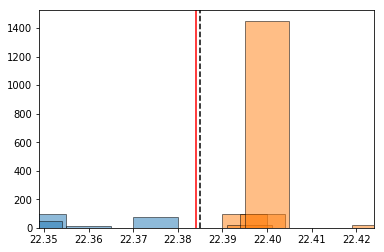

2445
2445


In [25]:
row = df.iloc[indicies[0]]
mid_price = row["P_bid_1"] + (row["P_ask_1"] - row["P_bid_1"])/2
print(row["P"], row["Dir"], row["P_bid_1"], row["P_ask_1"], mid_price)
print(row["Class"], row["P"])
if (row["Dir"] == -1):
    lob(row)
else:
    lob(row, color="blue")
    
print(len(df[df["OrderID"] == 0]))
print(len(df[df["OrderID"] < 1e5]))

In [32]:
print(indicies[:10])

[30, 31, 88, 113, 115, 116, 318, 324, 498, 501]


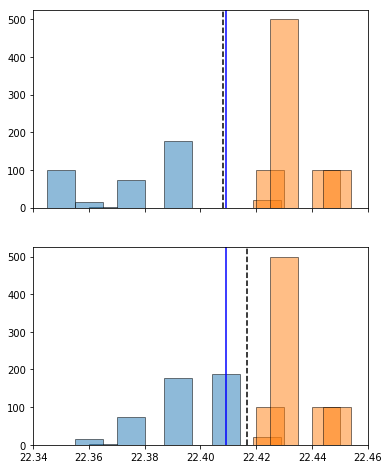

In [47]:
fig, (ax, bx) = plt.subplots(2, 1, figsize=(6,8), sharex=True)

row = df.iloc[324]
lob(ax, row)
row = df.iloc[330]
lob(bx, row)

plt.xlim(22.34, 22.46)
plt.show()

In [4]:
cancelledOrderID = set(df[(df['Type']==2)].OrderID.tolist())
#len(cancelledOrderID)
lookup = {1:'Sub', 2:'Can', 3:'Del', 4:'ExVis',5:'ExHid',7:'Halt'}

In [5]:
def RenameColumn(df,state_type):
    old_col = df.columns.tolist()
    new_col = []
    for col in old_col:
        if ( ("bid" in col) | ("ask" in col) ):
            new_col.append(col+str(" ")+state_type)
        elif ((col == 'V') | (col == 'P')):
            new_col.append(col+str(" ")+state_type)  
        elif (col=='Time'):
            new_col.append(col+str(" ")+state_type)
        else:
            new_col.append(col)
    columns = dict(zip(old_col,new_col))
    df.rename(columns=columns,inplace=True)
    return 

In [6]:
def GroupByOrderType(df,typeID):                        # for now, typeID should only be 2 or 3 or 4 or 5
    # lookup dictionary
    lookup = {1:'Sub', 2:'Can', 3:'Del', 4:'ExVis',5:'ExHid',7:'Halt'}
    # getting all the orders of type typeID
    orderID_set = set(df[(df['Type']==typeID)].OrderID.tolist())
    df_subset = df.loc[df['OrderID'].isin(orderID_set)]
    
    # get initial states when orders of this type is submitted
    df_init = df_subset[(df_subset['Type']==1)]
    RenameColumn(df_init,state_type=lookup[1])
    
    # get the end states of type typeID
    df_end = df_subset[(df_subset['Type']==typeID)]
    RenameColumn(df_end,state_type=lookup[typeID])
    
    # merge these two dataframes
    df = df_init.merge(df_end, left_on='OrderID', right_on='OrderID', how='outer')

    return df

In [7]:
df_OC = GroupByOrderType(df,typeID=2)
df_Executed = GroupByOrderType(df,typeID=4)
df_Deleted = GroupByOrderType(df,typeID=3)
print(len(df_OC.index))
print(len(df_Executed.index))

450
8974


In [8]:
print(len(df[(df['Type']==2)].index))
print(len(df[(df['Type']==4)].index))
print(len(df[(df['Type']==3)].index))

450
8974
66685


In [9]:
#df_OC.columns

In [10]:
#df_OC[["Time_stamp_x","Time_stamp_y"]].head(10)

In [11]:
def AddLifetime(df):
    df_new = df.copy(deep=False)
    lifetime = []
    for index, row in df_new.iterrows():
        # check if the keys exist
        try:
            dummy = row['Time_stamp_y'] - row['Time_stamp_x']
        except KeyError:
            print("columns not exist.")
        lifetime.append(dummy)
    df_new['Lifetime'] = lifetime
    df_new = df_new.dropna(how='any')
    return df_new

In [12]:
df_OC = AddLifetime(df_OC)
df_Executed = AddLifetime(df_Executed)
df_Deleted = AddLifetime(df_Deleted)
#df_OC.head(5)

In [13]:
def AddVoltsAndNumberOfSumbittedOrders(df,dt_mins,df_original):
    # make a copy 
    df_new = df.copy(deep=False)
    # obtain a df of executed visible orders and 
    #        a df of submitted orders
    df_submitted = GroupByOrderType(df_original,typeID=1).dropna(how='any')
    df_visExecute = GroupByOrderType(df_original,typeID=4).dropna(how='any')
    # convert delta t to seconds
    dt = dt_mins * 60
    # get submission times of all orders in the df
    try:
        submission_times = df_new[['OrderID','Time_stamp_x']]
    except KeyError:
        print("columns not exist.")    
    # now, gather all executed order prices between
    # the above times and (times-dt)
    norders,volts = [],[]
    # iterate through each row
    for index, row in submission_times.iterrows():
        t = row['Time_stamp_x']
        submitted_order = df_submitted[(df_submitted["Time_stamp_x"] > t-dt) & (df_submitted["Time_stamp_x"] < t)]
        executed_order = df_visExecute[(df_visExecute["Time_stamp_y"] > t-dt) & (df_visExecute["Time_stamp_y"] < t)]
        # computing...
        norder = len(submitted_order['OrderID'])
        volt = np.std(executed_order['P Sub'])
        # appending to corresponding lists
        norders.append(norder)
        volts.append(volt)
    # appending the results 
    df_new['Volt'] = volts
    df_new['#OrdersSub'] = norders
    return df_new

In [14]:
df_OC = AddVoltsAndNumberOfSumbittedOrders(df_OC,dt_mins=15,df_original=df)
df_Executed = AddVoltsAndNumberOfSumbittedOrders(df_Executed,dt_mins=15,df_original=df)
df_Deleted = AddVoltsAndNumberOfSumbittedOrders(df_Deleted,dt_mins=15,df_original=df)
df_Executed.tail(5)

KeyboardInterrupt: 

In [ ]:
def AddSpreadTwoStates(df):
    # make a copy
    df_new = df.copy(deep=False)
    # lookup dictionary
    lookup = {1:'Sub', 2:'Can', 3:'Del', 4:'ExVis',5:'ExHid',7:'Halt'}
    # gather the order type
    for col in df_new.columns.tolist():
        if 'Can' in col:
            orderType = 'Can'
            break
        elif 'ExVis' in col:
            orderType = 'ExVis'
            break
        elif 'Del' in col:
            orderType = 'Del'
            break
    
    # define designated columns at end state
    ask_end = 'P_ask_1 ' + orderType
    bid_end = 'P_bid_1 ' + orderType
    # adding spreads at start and end states
    spreads_start,spreads_end = [],[]
    for index, row in df_new.iterrows():
        try:
            spread_start = row['P_ask_1 Sub'] - row['P_bid_1 Sub']
            spread_end = row[ask_end] - row[bid_end]
        except KeyError:
            print('Columns not exist.')
        spreads_start.append(spread_start)
        spreads_end.append(spread_end)
    # append them to the dataframe
    df_new['Eff_spr_str'] = spreads_start
    df_new['Eff_spr_end'] = spreads_end
    # return
    return df_new

In [ ]:
df_OC = AddSpreadTwoStates(df_OC)
df_Executed = AddSpreadTwoStates(df_Executed)
df_Deleted = AddSpreadTwoStates(df_Deleted)

In [ ]:
# of all EXECUTION ORDERS
df_Executed.head(5)

In [ ]:
# of all CANCELLED ORDERS
#df_OC.head(5)
#print(df_OC.columns)
test=df_OC[['OrderID','Time_stamp_x','Type_x','V Sub','P Sub',
           'P_ask_1 Sub', 'V_ask_1 Sub', 'P_bid_1 Sub','V_bid_1 Sub',
           'P_ask_2 Sub', 'V_ask_2 Sub', 'P_bid_2 Sub','V_bid_2 Sub',
           'P_ask_3 Sub', 'V_ask_3 Sub', 'P_bid_3 Sub','V_bid_3 Sub',
           'P_ask_4 Sub', 'V_ask_4 Sub', 'P_bid_4 Sub','V_bid_4 Sub',
           'P_ask_5 Sub', 'V_ask_5 Sub', 'P_bid_5 Sub','V_bid_5 Sub',]].head(2)
test.to_csv('example_OC.csv')

In [ ]:
# of all DELETED ORDERS
#df_Deleted.head(5)

## Stuff below: referenced from paper 462

In [ ]:
print(df.columns.values)

In [ ]:
def ComputeTimeInsenstiveSet(df_original, levels=5):
    df = df_original.copy(deep=False)
    for i in range(1,levels+1):
        # compute bid-ask spreads and mid-prices (v2)
        df["bid-ask spread {}".format(i)] = df["P_ask_{}".format(i)] - df["P_bid_{}".format(i)]
        df["mid-price {}".format(i)] = (df["P_ask_{}".format(i)] + df["P_bid_{}".format(i)])/2
        # compute price differences (v3)
        df["d_P_ask_{}{}".format(levels,1)] = df["P_ask_{}".format(levels)] - df["P_ask_1"]
        df["d_P_bid_{}{}".format(levels,1)] = df["P_bid_{}".format(levels)] - df["P_bid_1"]
        for j in range(1,levels):
            df["d_P_ask_{}{}".format(j+1,j)] = np.abs(df["P_ask_{}".format(j+1)] - df["P_ask_{}".format(j)])
            df["d_P_bid_{}{}".format(j+1,j)] = np.abs(df["P_bid_{}".format(j+1)] - df["P_bid_{}".format(j)])
        # compute mean prices and volumes (v4)
        df["Mean_P_ask"] = df[["P_ask_{}".format(i) for i in range(1,levels+1)]].mean(axis=1)
        df["Mean_P_bid"] = df[["P_bid_{}".format(i) for i in range(1,levels+1)]].mean(axis=1)
        df["Mean_V_ask"] = df[["V_ask_{}".format(i) for i in range(1,levels+1)]].mean(axis=1)
        df["Mean_V_bid"] = df[["V_bid_{}".format(i) for i in range(1,levels+1)]].mean(axis=1)
        # compute accumulated differences (v5)
        df["P_accu"] = df[["P_ask_{}".format(i) for i in range(1,levels+1)]].sum(axis=1) \
            - df[["P_bid_{}".format(i) for i in range(1,levels+1)]].sum(axis=1)
        df["V_accu"] = df[["V_ask_{}".format(i) for i in range(1,levels+1)]].sum(axis=1) \
            - df[["V_bid_{}".format(i) for i in range(1,levels+1)]].sum(axis=1)
    # returning...
    return df

In [ ]:
df = ComputeTimeInsenstiveSet(df)
#df[["Ask Price 1", "Bid Price 1", "bid-ask spread 1", "mid-price 1", "d_P_ask_32", "Mean_P_ask"]].head(10)
#df[["Ask Price 1", "Ask Price 2", "Ask Price 3", "Ask Price 4", "Ask Price 5", "Mean_P_ask"]].head(10)
#df.head(10)
print(df.shape)
print(df.shape[0] * df.shape[1] * 8 / (1024**3))

In [ ]:
def ComputeTimeSensitiveSet(df_original,levels=5,dt_secs=1): 
    df = df_original.copy(deep=False)
    # 
    for index, row in df.iterrows():
        t = row['Time_stamp']
        temp = df.loc[(df['Time_stamp']>t-dt_secs)&(df['Time_stamp']<=t)] # for v6
        # Note: direction = 1 <--> buy/bid order;   direction = -1 <--> sell/ask order
        temp_la = df.loc[(df['Time_stamp']>t-dt_secs)&(df['Time_stamp']<=t)&(df['Dir']==-1)] # limit ask order
        temp_lb = df.loc[(df['Time_stamp']>t-dt_secs)&(df['Time_stamp']<=t)&(df['Dir']==1)]  # limit bid order
        temp_ca = df.loc[(df['Time_stamp']>t-dt_secs)&(df['Time_stamp']<=t)
                         &(df['Dir']==-1)&(df['Type']==2)] # cancelled limit ask order
        temp_cb = df.loc[(df['Time_stamp']>t-dt_secs)&(df['Time_stamp']<=t)
                         &(df['Dir']==1)&(df['Type']==2)]  # cancelled limit buy order
        for i in range(1,levels+1):
            # compute price and volume derivatives (v6)
            df.set_value(index,'der_P_ask_{}'.format(i),
                         (temp['P_ask_{}'.format(i)].iloc[-1]-temp['P_ask_{}'.format(i)].iloc[0])/dt_secs) 
            df.set_value(index,'der_P_bid_{}'.format(i),
                         (temp['P_bid_{}'.format(i)].iloc[-1]-temp['P_bid_{}'.format(i)].iloc[0])/dt_secs) 
            df.set_value(index,'der_V_ask_{}'.format(i),
                         (temp['V_ask_{}'.format(i)].iloc[-1]-temp['V_ask_{}'.format(i)].iloc[0])/dt_secs) 
            df.set_value(index,'der_V_bid_{}'.format(i),
                         (temp['V_bid_{}'.format(i)].iloc[-1]-temp['V_bid_{}'.format(i)].iloc[0])/dt_secs) 
            # compute average intensity of each type (v7)
            df.set_value(index,'lam_la',int(len(temp_la.index)/dt_secs))
            df.set_value(index,'lam_lb',int(len(temp_lb.index)/dt_secs))
            df.set_value(index,'lam_ca',int(len(temp_ca.index)/dt_secs))
            df.set_value(index,'lam_cb',int(len(temp_cb.index)/dt_secs))
            # compute relative intensity indicators (v8) ???
            # compute accelerations (market/limit)  (v9) ???

    return df

In [ ]:
df_test = ComputeTimeSensitiveSet(df_original=df.head(5))

In [ ]:
df_test.columns
df_test[['Time_stamp','Type','Dir','lam_la','lam_lb','lam_ca','lam_cb']]

In [ ]:
def AddLabels(df_original, levels=5):  # based on page 16 of paper 462
    df = df_original.copy(deep=False)
    for index, row in df.iterrows():
        df["bid-ask spread label"]

In [ ]:
#df.head(5)

## Everything below seems to be your codes of making plots... if you wanna clean them up feel free to do that

In [ ]:
### Determine the cancellation rate during dt
plt.hist(df_test["Time_stamp_y"], bins=25)
start = df_test["Time_stamp_y"].min()
end = df_test["Time_stamp_y"].max()
print(start, end)
n = (end-start)/dt
Dt = np.linspace(start,end,n)
for i in Dt:
    plt.axvline(i, ls=":", color="k", alpha=0.5)
plt.title("Visual of approximate cancellation rate discretization")
plt.show()

In [ ]:
start_of_day = 9.5*3600 # 9:30 AM
end_of_day = 16*3600 # 4 PM
dt = 6.5*3600
n = (end_of_day - start_of_day)/dt
bins = np.linspace(start_of_day, end_of_day, n+1)
#print(dt)
#print(bins)
cancelled = plt.hist(df_test["Time_stamp_y"], bins=bins, alpha=0.5, histtype="step")
submitted = plt.hist(df_submitted["Time_stamp_x"], bins=bins, alpha=0.5, histtype="step")

print("Cancellation Ratio during dt:")
cancellation_ratio_during_dt = cancelled[0]/submitted[0]
print(cancellation_ratio_during_dt)

print("Cancellation Rate:")
cancellation_rate = cancelled[0]/dt
print(cancellation_rate)

In [ ]:
len(set(df[(df['Type']==2)]['OrderID'].tolist()))

In [ ]:
ks = [1,2,3,4,5,7]
for k in ks:
    print(len(set(df[(df['Type']==k)]['OrderID'].tolist())))

In [ ]:
df_test.columns

In [ ]:
data = df_test[["OrderID","Time Submission","Direction_x","Price Submission","Size Submission",
                "Time Cancellation","lifetime","Size Cancellation",
                "Ask Price 1 Submission","Bid Price 1 Submission","Ask Price 1 Cancellation","Bid Price 1 Cancellation"]]
data["Effective Spread Submission"] = data['Ask Price 1 Submission'] - data['Bid Price 1 Submission']
data["Effective Spread Cancellation"] = data['Ask Price 1 Cancellation'] - data['Bid Price 1 Cancellation']
data["Volatility"] = volts
data["Number of Orders Submitted"] = norders
#len(data.index)
data.head(10)

In [ ]:
data.to_csv("AMZN_cancelledOrders.csv")

In [ ]:
## plotting...
x = data['Time Submission']
y = data['Price Submission']
plt.plot(x,y)
plt.xlabel("Time Submission")
plt.ylabel("")

In [ ]:
lookup = {1:'Submission', 2:'Cancellation', 3:'Deletion', 4:'Execution Visible',5:'Execution Hidden',7:'Trading Halt'}
for values in lookup.values():
    print(values)

In [ ]:
df1 = pd.DataFrame({'a':range(1,5), 'b':['a','b','c','d']})
df1

In [ ]:
df1["a"].iloc[-1] 